# Proyek Analisis Data: AIR QUALITY
- **Nama:** Mochammad Wahyu Ramadhan
- **Email:** wahyuramadhan9090@gmail.com
- **ID Dicoding:** wahyuramadhan

## Menentukan Pertanyaan Bisnis



1. Bagaimana distribusi tingkat paparan PM2.5 di setiap stasiun pemantauan selama periode pengamatan 2013–2017?

2. Stasiun mana yang paling sering mengalami kondisi kualitas udara tidak sehat berdasarkan kategori PM2.5 selama periode 2013–2017?\


## Import Semua Packages/Library yang Digunakan

In [1]:
# Library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan tampilan visualisasi
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
import os

# Menentukan lokasi folder dataset
data_path = "dataset"

# Mengambil seluruh file CSV dalam folder dataset
csv_files = [
    os.path.join(data_path, file)
    for file in os.listdir(data_path)
    if file.endswith(".csv")
]

# Mengecek jumlah file yang digunakan
len(csv_files)

12

In [3]:
# Membaca dan menggabungkan seluruh file CSV
data_list = []

for file in csv_files:
    temp_df = pd.read_csv(file)
    data_list.append(temp_df)

air_quality_df = pd.concat(data_list, ignore_index=True)

air_quality_df.shape

(420768, 18)

**Insight:**
- Dataset yang digunakan terdiri dari beberapa file CSV yang merepresentasikan data kualitas udara dari stasiun pemantauan yang berbeda.
- Seluruh file berhasil digabungkan menjadi satu dataset terintegrasi sehingga memungkinkan analisis lintas stasiun dalam satu kerangka waktu pengamatan.


### Assessing Data

In [4]:
# Melihat struktur data dan tipe setiap kolom
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
# Mengecek jumlah missing value pada setiap kolom
missing_values = air_quality_df.isnull().sum()
missing_values

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [6]:
# Mengecek duplikasi data
air_quality_df.duplicated().sum()

np.int64(0)

**Insight:**
- Hasil pemeriksaan struktur data menunjukkan bahwa dataset memiliki kombinasi variabel numerik dan kategorikal yang relevan untuk analisis kualitas udara.
- Beberapa kolom masih mengandung nilai kosong dan perlu ditangani lebih lanjut pada tahap data wrangling agar tidak memengaruhi hasil analisis.


### Cleaning Data

In [7]:
# Menangani missing value pada kolom numerik dengan median
numeric_cols = air_quality_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    air_quality_df[col] = air_quality_df[col].fillna(
        air_quality_df[col].median()
    )

In [8]:
# Menangani missing value pada kolom kategorikal dengan modus
categorical_cols = air_quality_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    air_quality_df[col] = air_quality_df[col].fillna(
        air_quality_df[col].mode()[0]
    )

In [9]:
# Menghapus data duplikat jika ditemukan
air_quality_df = air_quality_df.drop_duplicates()

air_quality_df.shape

(420768, 18)

**Insight:**
- Nilai kosong pada dataset ditangani menggunakan pendekatan statistik sederhana agar struktur data tetap terjaga dan tidak menimbulkan distorsi yang signifikan.
- Proses pembersihan data memastikan dataset berada dalam kondisi siap analisis, dengan menghilangkan potensi gangguan akibat nilai kosong dan duplikasi data.


## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
# Statistik ringkas PM2.5 per stasiun
pm25_summary = (
    air_quality_df
    .groupby('station')['PM2.5']
    .describe()[['min', '25%', '50%', '75%', 'max']]
    .reset_index()
)

pm25_summary

,station,min,25%,50%,75%,max
0,Aotizhongxin,3.0,23.0,56.0,112.0,898.0
1,Changping,2.0,18.0,48.0,98.0,882.0
2,Dingling,3.0,14.0,42.0,91.0,881.0
3,Dongsi,3.0,23.0,59.0,117.0,737.0
4,Guanyuan,2.0,24.0,58.0,113.0,680.0
5,Gucheng,2.0,25.0,58.0,114.0,770.0
6,Huairou,2.0,18.0,48.0,96.0,762.0
7,Nongzhanguan,2.0,23.0,57.0,114.0,844.0
8,Shunyi,2.0,20.0,55.0,109.0,941.0
9,Tiantan,3.0,23.0,57.0,112.0,821.0


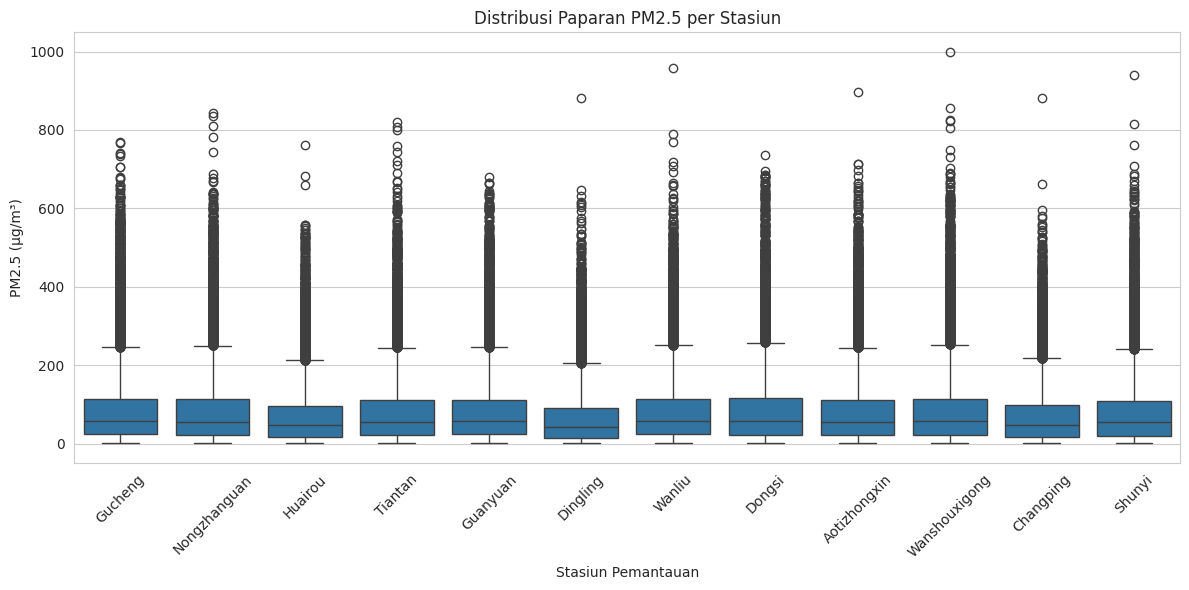

In [11]:
# Visualisasi distribusi PM2.5 per stasiun
plt.figure(figsize=(12,6))
sns.boxplot(data=air_quality_df, x='station', y='PM2.5')
plt.xticks(rotation=45)
plt.title("Distribusi Paparan PM2.5 per Stasiun")
plt.xlabel("Stasiun Pemantauan")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()

**Insight:**

- Distribusi PM2.5 menunjukkan perbedaan tingkat paparan antar stasiun, terlihat dari variasi median dan rentang antar kuartil.
- Beberapa stasiun memiliki sebaran nilai yang lebih lebar, mengindikasikan fluktuasi paparan PM2.5 yang lebih tinggi dibandingkan stasiun lainnya.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi tingkat paparan PM2.5 di setiap stasiun pemantauan selama periode pengamatan 2013–2017?

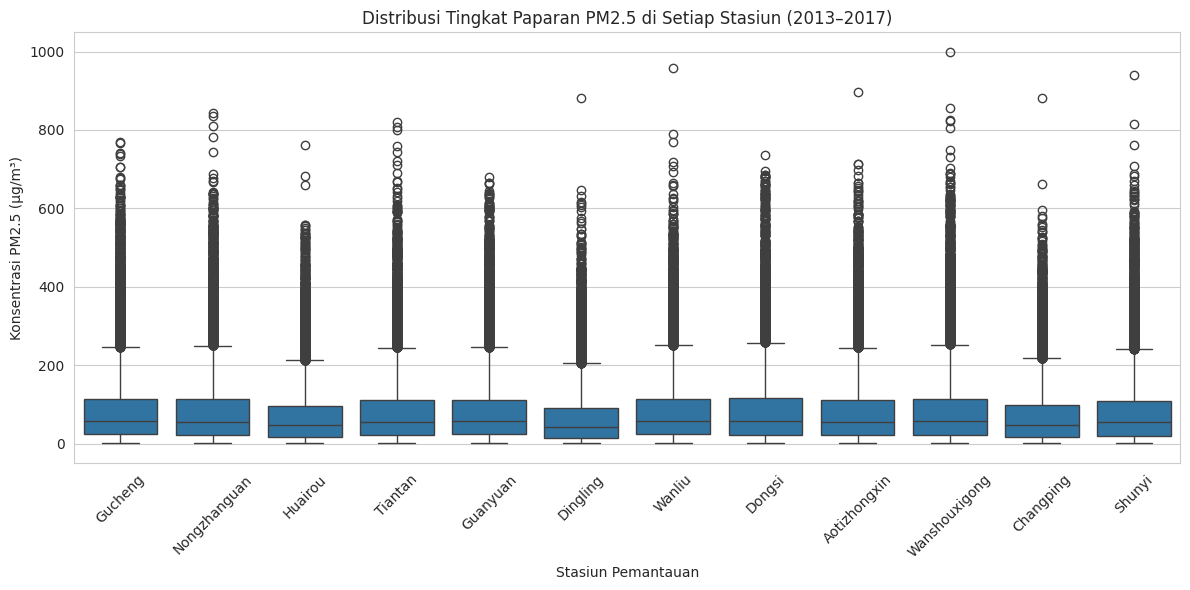

In [12]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=air_quality_df,
    x='station',
    y='PM2.5'
)

plt.title("Distribusi Tingkat Paparan PM2.5 di Setiap Stasiun (2013–2017)")
plt.xlabel("Stasiun Pemantauan")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Explanatory Analysis:**

Berdasarkan visualisasi boxplot, terlihat bahwa setiap stasiun pemantauan memiliki karakteristik distribusi paparan PM2.5 yang berbeda. Perbedaan ini tercermin dari variasi nilai median serta rentang antar kuartil di masing-masing stasiun.

Beberapa stasiun menunjukkan median konsentrasi PM2.5 yang relatif lebih tinggi dengan sebaran nilai yang lebih luas, menandakan tingkat paparan polusi yang lebih berat dan fluktuatif. Sebaliknya, stasiun dengan median yang lebih rendah cenderung memiliki distribusi yang lebih sempit, mengindikasikan kondisi kualitas udara yang relatif lebih stabil selama periode pengamatan.


### Pertanyaan 2: Stasiun mana yang paling sering mengalami kondisi kualitas udara tidak sehat berdasarkan kategori PM2.5 selama periode 2013–2017?

In [16]:
# (Opsional) Membuat kategori PM2.5 jika belum tersedia
if 'pm25_category' not in air_quality_df.columns:
    bins = [0, 50, 100, 150, float('inf')]
    labels = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat']
    air_quality_df['pm25_category'] = pd.cut(
        air_quality_df['PM2.5'],
        bins=bins,
        labels=labels
    )

In [17]:
unhealthy_count = (
    air_quality_df[
        air_quality_df['pm25_category'].isin(['Tidak Sehat', 'Sangat Tidak Sehat'])
    ]
    .groupby('station')
    .size()
    .reset_index(name='total_unhealthy')
    .sort_values('total_unhealthy', ascending=False)
)

unhealthy_count.head()

,station,total_unhealthy
3,Dongsi,10695
11,Wanshouxigong,10471
10,Wanliu,10457
5,Gucheng,10426
7,Nongzhanguan,10349


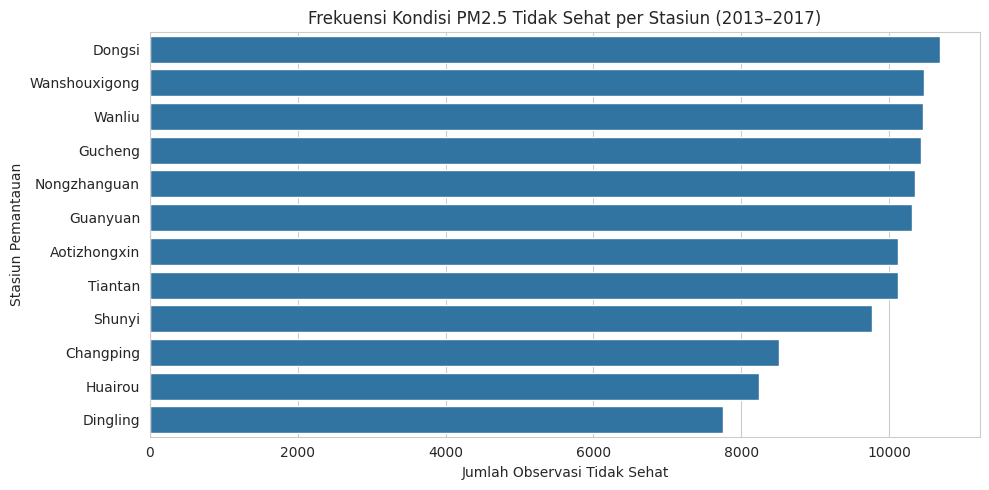

In [18]:
plt.figure(figsize=(10, 5))

sns.barplot(
    data=unhealthy_count,
    y='station',
    x='total_unhealthy'
)

plt.title("Frekuensi Kondisi PM2.5 Tidak Sehat per Stasiun (2013–2017)")
plt.xlabel("Jumlah Observasi Tidak Sehat")
plt.ylabel("Stasiun Pemantauan")
plt.tight_layout()
plt.show()

**Explanatory Analysis:**

Hasil visualisasi menunjukkan bahwa frekuensi kondisi kualitas udara tidak sehat bervariasi antar stasiun pemantauan. Beberapa stasiun tercatat lebih sering mengalami kategori PM2.5 tidak sehat dan sangat tidak sehat dibandingkan stasiun lainnya.

Temuan ini mengindikasikan adanya perbedaan tingkat risiko paparan polusi udara antar lokasi, yang berpotensi dipengaruhi oleh karakteristik lingkungan dan aktivitas di sekitar stasiun pemantauan tersebut.


**Insight:**
- Distribusi konsentrasi PM2.5 menunjukkan adanya perbedaan karakteristik paparan antar stasiun pemantauan, yang tercermin dari variasi nilai median serta sebaran data di masing-masing stasiun.
- Selain perbedaan distribusi, frekuensi kondisi kualitas udara tidak sehat juga bervariasi antar stasiun. Beberapa stasiun tercatat lebih sering mengalami kategori PM2.5 tidak sehat dan sangat tidak sehat, yang mengindikasikan tingkat risiko paparan polusi udara yang lebih tinggi dibandingkan stasiun lainnya.

In [28]:
import pandas as pd
import os

# path folder dataset
DATASET_PATH = "/content/dataset"

# ambil semua file csv
csv_files = [f for f in os.listdir(DATASET_PATH) if f.endswith(".csv")]

df_list = []

for file in csv_files:
    df = pd.read_csv(os.path.join(DATASET_PATH, file))
    df_list.append(df)

# gabungkan semua data
air_quality_df = pd.concat(df_list, ignore_index=True)

# bikin kolom datetime
air_quality_df["datetime"] = pd.to_datetime(
    air_quality_df[["year", "month", "day", "hour"]],
    errors="coerce"
)

air_quality_df = air_quality_df.dropna(subset=["datetime"])

# simpan hasil akhir
air_quality_df.to_csv("main_data.csv", index=False)

print("✅ main_data.csv berhasil dibuat")
air_quality_df.head()

✅ main_data.csv berhasil dibuat


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


In [30]:
from google.colab import drive
drive.mount("/content/drive")

air_quality_df.to_csv(
    "/content/drive/MyDrive/main_data.csv",
    index=False
)

Mounted at /content/drive


## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclusion Pertanyaan 1:**  
Analisis distribusi konsentrasi PM2.5 menunjukkan bahwa setiap stasiun pemantauan memiliki karakteristik paparan yang berbeda selama periode 2013–2017. Perbedaan tersebut terlihat dari variasi nilai median dan sebaran konsentrasi PM2.5, yang mengindikasikan bahwa tingkat paparan polusi udara tidak merata antar lokasi pemantauan.

- **Conclusion Pertanyaan 2:**  
Berdasarkan analisis frekuensi kategori PM2.5, diketahui bahwa kejadian kondisi kualitas udara tidak sehat tidak terjadi secara seragam di seluruh stasiun. Beberapa stasiun tercatat lebih sering mengalami kondisi PM2.5 tidak sehat dan sangat tidak sehat, sehingga dapat disimpulkan bahwa tingkat risiko paparan polusi udara berbeda antar stasiun pemantauan selama periode pengamatan.
